# **Exploratory Data Analysis Project Group 8**
## **The Analysis of MBTI Personality Types and Movie Scores**

Coded by Yitian "Ewan". Reviewed, tested and corrected by Daniel, Sai Nandini, and Xiaotong

### **1.0 Importing the necessary libraries and the dataset**

In [77]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
import os

In [78]:
# Get working directory
current_wd = os.getcwd()
data_wd = f"{current_wd}/data/cleaned"

# Load the df_merged dataset
df_merged = pd.read_csv(data_wd + "/df_merged.csv")

# Display the first few rows of the dataframe
df_merged.head()


,Unnamed: 0,mbti,character,movie_name,release_year,genre,revenue,score,metascore
0,349,ENFP,Regina,12 Hour Shift,2020.0,"Comedy, Horror, Thriller",NaN,5.3,63.0
1,347,ESFP,Officer Myers,12 Hour Shift,2020.0,"Comedy, Horror, Thriller",NaN,5.3,63.0
2,348,ESTP,Jefferson,12 Hour Shift,2020.0,"Comedy, Horror, Thriller",NaN,5.3,63.0
3,350,INFJ,Mandy,12 Hour Shift,2020.0,"Comedy, Horror, Thriller",NaN,5.3,63.0
4,352,ENTP,Benjamin Franklin,1776,1972.0,"Drama, Family, History",6104000.0,7.6,NaN


### **2.0 Plotting**

### 2.1 Density Plot of IMDb Score for Each MBTI Personality

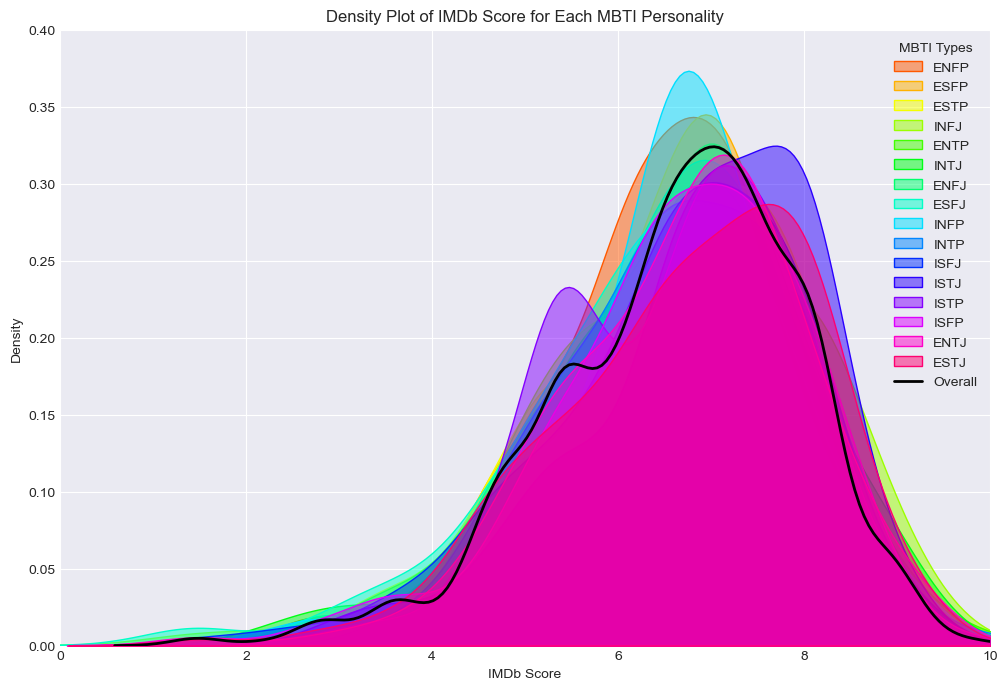

In [79]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for each MBTI type
fig, ax = plt.subplots(figsize=(12, 8))

# Getting unique MBTI types
mbti_types = df_merged['mbti'].unique()

# Creating a colorful palette with enough colors for each MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(mbti_types))

# Plotting the KDE plot for each MBTI type
for i, mbti in enumerate(mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Each MBTI Personality')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


### 2.2 Density Plot of High IMDb Score (8-10) for Each MBTI Personality

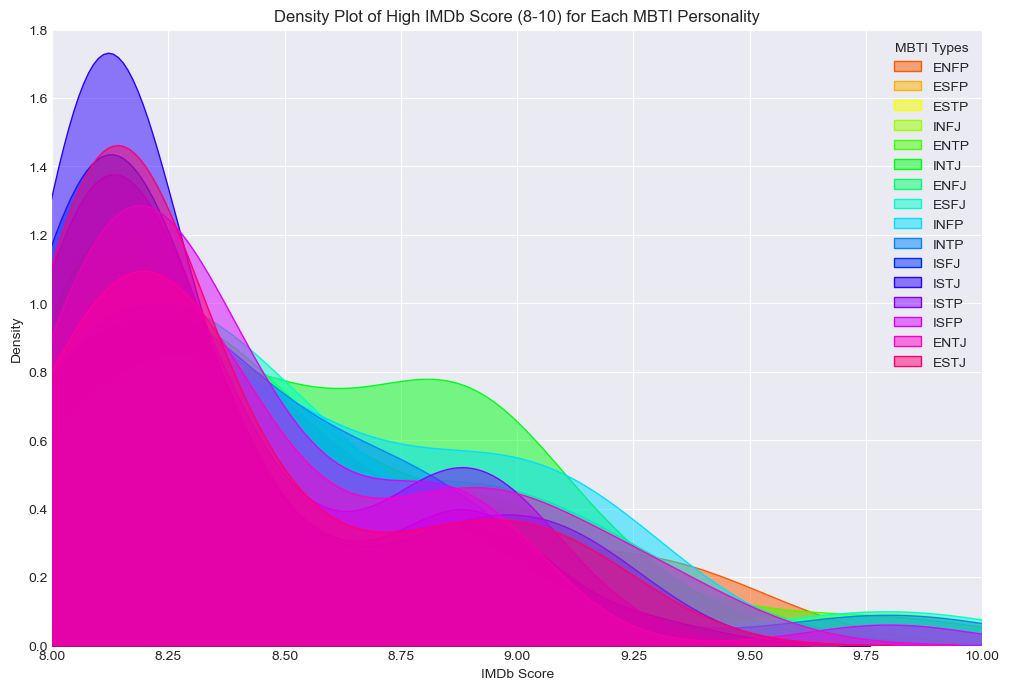

In [80]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Filtering the dataset for scores between 8 and 10
high_score_df = df_merged[df_merged['score'].between(8, 10)]

# Creating a colorful palette with enough colors for each MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(mbti_types))

# Plotting the density plot for each MBTI type
fig, ax = plt.subplots(figsize=(12, 8))

for i, mbti in enumerate(mbti_types):
    sns.kdeplot(high_score_df[high_score_df['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of High IMDb Score (8-10) for Each MBTI Personality')
ax.legend(title='MBTI Types')
plt.xlim(8, 10)  # Setting x-axis limits to 8 to 10
plt.ylim(0, 1.8)  # Setting y-axis limits to 0 to 1.8

plt.show()

### 2.3 Density Plot of IMDb Score for Each MBTI Personality

In [81]:
fig = go.Figure()

# Looping through each MBTI type to add a trace to the plot
for mbti in mbti_types:
    # Filtering data for each MBTI type
    filtered_df = df_merged[df_merged['mbti'] == mbti]

    # Adding a density trace with reversed axes
    fig.add_trace(go.Violin(x=filtered_df['score'],
                            y=filtered_df['mbti'],
                            name=mbti,
                            box_visible=True,
                            meanline_visible=True))

# Updating the layout of the figure
fig.update_layout(title='Density Plot of IMDb Score for Each MBTI Personality',
                  yaxis_title='MBTI Personality Type',
                  xaxis_title='IMDb Score',
                  violingap=0, violingroupgap=0, violinmode='overlay')

# Showing the plot
fig.show()


### 2.4 Population of Each MBTI Type in Movies

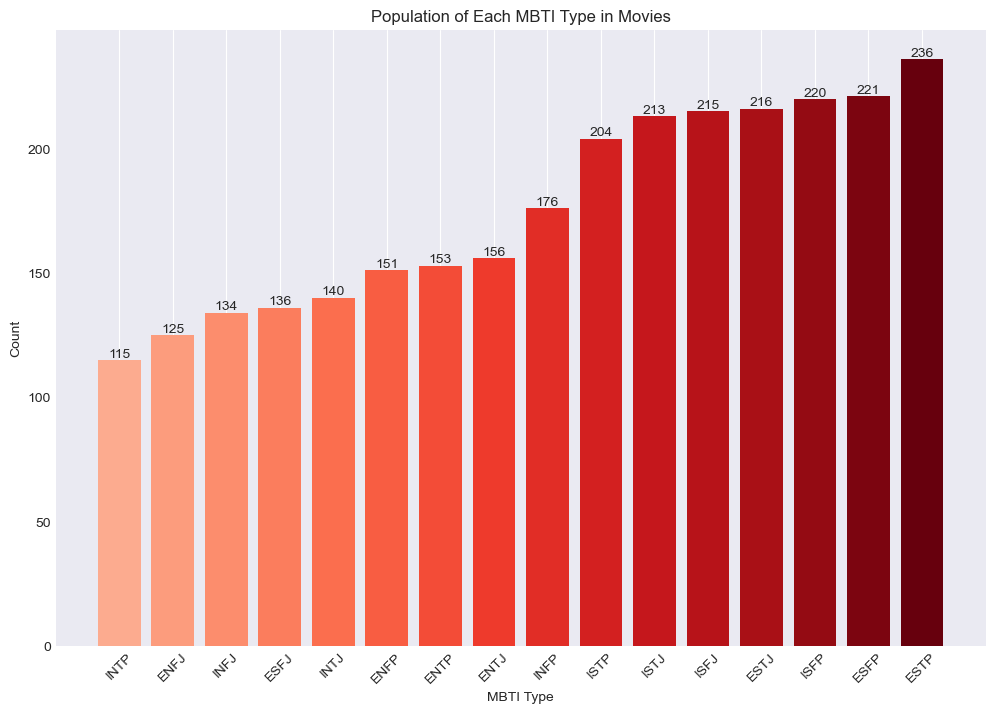

In [82]:
# Count the occurrences of each MBTI type
mbti_counts = df_merged['mbti'].value_counts()

# Order the counts from lowest to highest
mbti_counts_sorted = mbti_counts.sort_values()

# Creating a color gradient from dark red to light red
colors = plt.cm.Reds(np.linspace(0.3, 1, len(mbti_counts_sorted)))

# Plot with  colors and labels
plt.figure(figsize=(12, 8))
bars = plt.bar(mbti_counts_sorted.index, mbti_counts_sorted.values, color=colors)

# Adding labels (population amounts) to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Population of Each MBTI Type in Movies')
plt.xlabel('MBTI Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 2.5 Density Plot of IMDb Score for Selected MBTI Personality Types

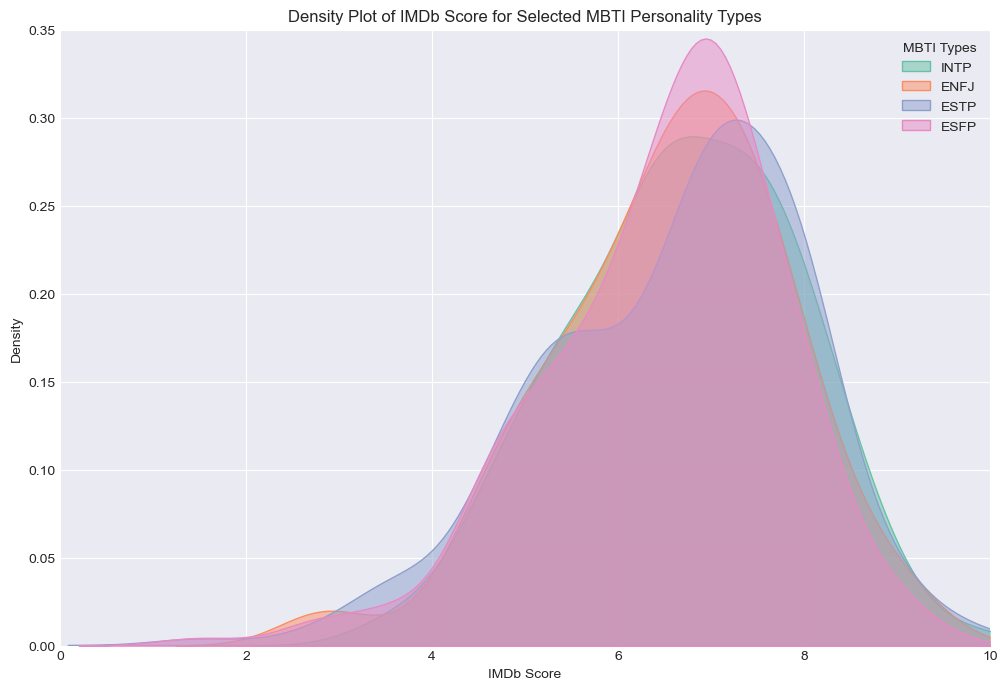

In [83]:
# Setting the plot style to the seaborn darkgrid style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types (INTP, ENFJ, ESTP, ESFP)
fig, ax = plt.subplots(figsize=(12, 8))

# List of MBTI types to visualize
selected_mbti_types = ['INTP', 'ENFJ', 'ESTP', 'ESFP']

# Using a distinct color palette such as 'tab10' or 'Set2'
palette = sns.color_palette("Set2", len(selected_mbti_types))

for i, mbti in enumerate(selected_mbti_types):
    # Plotting only for selected MBTI types
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personality Types')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.35)  # Setting y-axis limits to 0 to 0.35
plt.show()


### 2.6 Analyzing the Relationships: Score in Relation to Revenue and Metascore

r^2 of Score VS Revenue = 0.16.
r^2 of Score VS Metascore = 0.664.


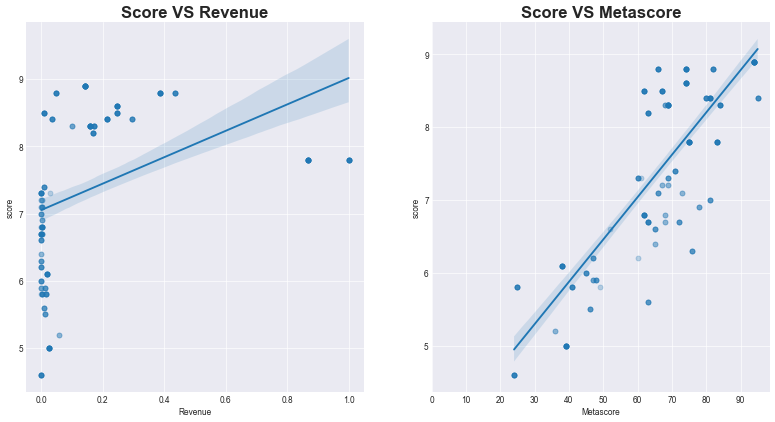

In [84]:
# Dropping rows with NaN values in 'revenue' or 'metascore' columns
df_cleaned = df_merged.dropna(subset=['revenue', 'metascore'])

# Creating a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(figsize=(16,8), dpi=60, nrows=1, ncols=2)

# Extracting the 'revenue' column
x1 = df_cleaned['revenue']
# Initializing the MinMaxScaler to normalize data
scaler = MinMaxScaler()
# Normalizing the revenue data to handle large variations in values
x1 = scaler.fit_transform(x1.values.reshape(-1, 1))

# Extracting the 'metascore' column
x2 = df_cleaned['metascore']
# Extracting the dependent variable 'score'
y = df_cleaned['score']

# Combining the independent variables and corresponding axes for plotting
x_list_1 = [x1, x2]
ax_list_1 = [ax1, ax2]

# Looping through each x and ax pair for plotting
for x, ax in zip(x_list_1, ax_list_1):
    # Creating a scatter plot with a regression line
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.28})

# Setting title, labels and other formatting for the first subplot
ax1.set_title('Score VS Revenue', fontsize=20, fontweight ='heavy')
ax1.set_xlabel('Revenue')

# Setting title, labels, ticks, and other formatting for the second subplot
ax2.set_title('Score VS Metascore', fontsize=20, fontweight ='heavy')
ax2.set_xticks(range(0, 100, 10))
ax2.set_xlabel('Metascore')

# Performing linear regression for 'Score VS Revenue'
lin_reg_1 = LinearRegression().fit(x1, y)
# Calculating the R^2 value for the first regression
r2_1 = lin_reg_1.score(x1, y)

# Performing linear regression for 'Score VS Metascore'
lin_reg_2 = LinearRegression().fit(x2.values.reshape(-1, 1), y)
# Calculating the R^2 value for the second regression
r2_2 = lin_reg_2.score(x2.values.reshape(-1, 1), y)

# Printing the R^2 values for both regressions
print(f'r^2 of Score VS Revenue = {round(r2_1,3)}.')
print(f'r^2 of Score VS Metascore = {round(r2_2,3)}.')

# Removing the top and right spines from the plots
sns.despine()
# Displaying the plots
plt.show()


2.7

In [85]:
# Get working directory
current_wd = os.getcwd()
data_wd = f"{current_wd}/data/cleaned"
raw_data_wd = f"{current_wd}/data/raw"

# Load the df_merged dataset
df_merged = pd.read_csv(data_wd + "/df_merged.csv")
df_imdb = pd.read_csv(raw_data_wd + "/imdb (1000 movies) .csv")

In [86]:
#Import data and cleanup data


cols=['Ranking', 'Movie_Name', 'Year', 'Certificate', 'Runtime(Minutes)', 'Genre', 'Score', 'Metascore', 'About',
      'Director', 'Actor_1', 'Actor_2', 'Actor_3', 'Actor_4', 'Votes', 'Gross_Collection(Million)']
df_imdb.columns=cols
df_imdb = df_imdb.drop(columns=['Certificate','About'])
df_imdb.sample(5)
df_imdb[(df_imdb['Gross_Collection(Million)'].isnull())|(df_imdb['Gross_Collection(Million)']=='$0.00M')].sample(5)

# Filter the line without box office
df_imdb=df_imdb[(df_imdb['Gross_Collection(Million)'].notnull())&(df_imdb['Gross_Collection(Million)']!='$0.00M')]

# Change the data type and remove the useless string
df_imdb['Ranking']=df_imdb['Ranking'].astype('int64')
df_imdb['Year']=df_imdb['Year'].str.replace('-','')
df_imdb['Runtime(Minutes)']=df_imdb['Runtime(Minutes)'].str.replace(' min','').astype('float64')
df_imdb['Votes']=df_imdb['Votes'].str.replace(',','').astype('int64')
df_imdb['Gross_Collection(Million)']=df_imdb['Gross_Collection(Million)'].str.replace('$','')
df_imdb['Gross_Collection(Million)']=df_imdb['Gross_Collection(Million)'].str.replace('M','').astype('float64')


/var/folders/zq/p2d6bynj3zzdl_5hz8cv2qqr0000gn/T/ipykernel_206/3444005682.py:19: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [87]:
# Functions that only extract numerical data from columns
def only_numerics(seq):
    seq_type= type(seq)
    return seq_type().join(filter(seq_type.isdigit, seq))

In [88]:
df_imdb['Year']=df_imdb['Year'].apply(only_numerics).astype('int64')

### 2.7 The correlation between IMDB rating and other movie features

In [89]:
# Disassemble the Genre column into a column containing only one genre
df_imdb['Genre_1']=df_imdb['Genre'].str.split(', ',expand=True)[0]
df_imdb['Genre_2']=df_imdb['Genre'].str.split(', ',expand=True)[1]
df_imdb['Genre_3']=df_imdb['Genre'].str.split(', ',expand=True)[2]
df_imdb['Count']=1
df_imdb=df_imdb.drop_duplicates()

# Due to insufficient data, there is no method of calculating the average metascore or filling in its empty value
# Therefore, this analysis will not focus on Metascore
df_year_meta=df_imdb.groupby(['Year'])['Metascore'].mean()
df_year_meta

Year
1921          NaN
1924          NaN
1925    97.000000
1926          NaN
1927    98.000000
          ...    
2017    79.153846
2018    74.846154
2019    81.285714
2020    72.000000
2021    72.500000
Name: Metascore, Length: 96, dtype: float64

r^2 of Score VS Runtime in Minutes = 0.062.
r^2 of Score VS No. of Votes = 0.324.
r^2 of Score VS Gross_Collection(Million) = 0.012.
r^2 of Score VS Metascore = 0.008.


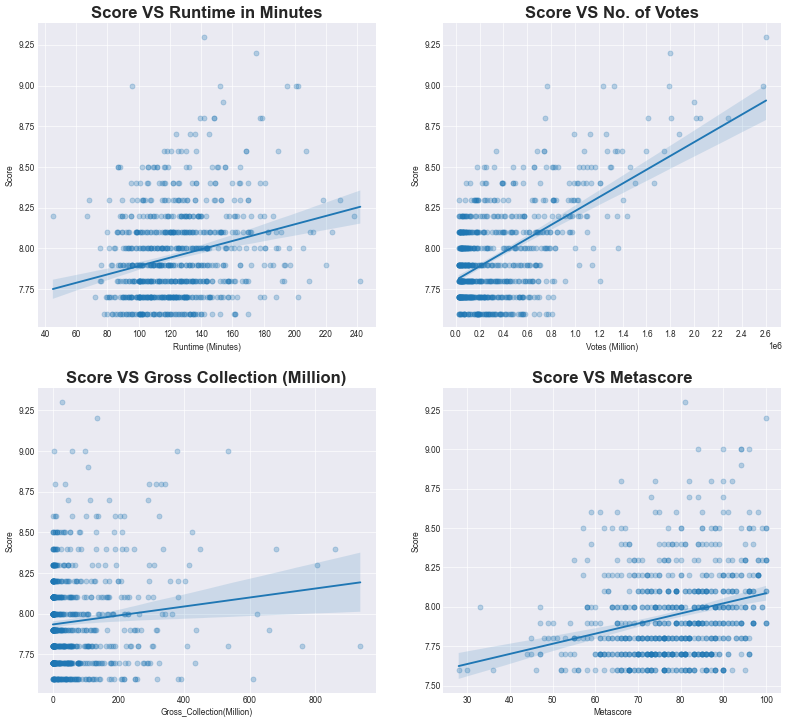

In [90]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16,14.5), dpi=60, nrows=2, ncols=2)

x1=df_imdb['Runtime(Minutes)']
x2=df_imdb['Votes']
x3=df_imdb['Gross_Collection(Million)']
x4=df_imdb['Metascore']
y=df_imdb['Score']

x_list_1=[x1,x2,x3,x4]
ax_list_1=[ax1,ax2,ax3,ax4]

for x,ax in zip(x_list_1,ax_list_1):
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.28})

ax1.set_title('Score VS Runtime in Minutes', fontsize=20, fontweight ='heavy')
ax1.set_xticks(range(40,260,20))
ax1.set_xlabel('Runtime (Minutes)')

ax2.set_title('Score VS No. of Votes', fontsize=20, fontweight ='heavy')
ax2.set_xticks(range(0,2750000,200000))
ax2.set_xlabel('Votes (Million)')

ax3.set_title('Score VS Gross Collection (Million)', fontsize=20, fontweight ='heavy')

ax4.set_title('Score VS Metascore', fontsize=20, fontweight ='heavy')

# Calculate R^2 value
lin_reg_1=LinearRegression().fit(df_imdb[['Runtime(Minutes)']], y)
lin_reg_2=LinearRegression().fit(df_imdb[['Votes']], y)
lin_reg_3=LinearRegression().fit(df_imdb[['Gross_Collection(Million)']], y)
lin_reg_4=LinearRegression().fit(df_imdb[['Metascore']].notnull(), y)

r2_1=lin_reg_1.score(df_imdb[['Runtime(Minutes)']], y)
r2_2=lin_reg_2.score(df_imdb[['Votes']], y)
r2_3=lin_reg_3.score(df_imdb[['Gross_Collection(Million)']], y)
r2_4=lin_reg_4.score(df_imdb[['Metascore']].notnull(), y)

print(f'r^2 of Score VS Runtime in Minutes = {round(r2_1,3)}.')
print(f'r^2 of Score VS No. of Votes = {round(r2_2,3)}.')
print(f'r^2 of Score VS Gross_Collection(Million) = {round(r2_3,3)}.')
print(f'r^2 of Score VS Metascore = {round(r2_4,3)}.')

sns.despine()
plt.show()

### 2.8 What is the "average IMDB scoreg" and "total number of film" by each director? Is there any correlation between the two?

In [91]:
# Director's "average score" and "total number of movies directed"
df_rate_dir=df_imdb.groupby('Director').agg({'Score':'mean','Count':'sum'}).sort_values(by='Score',ascending=False)
df_rate_dir['Score']=round(df_rate_dir['Score'],2)
df_rate_dir.columns=['Ave_Score','Film Counts']
df_rate_dir

,Ave_Score,Film Counts
Director,,
Frank Darabont,8.95,2
Irvin Kershner,8.70,1
Lana Wachowski,8.70,1
Fernando Meirelles,8.60,1
Roberto Benigni,8.60,1
...,...,...
Jonathan Levine,7.60,1
Georges Franju,7.60,1
Aneesh Chaganty,7.60,1


r^2 = 0.044


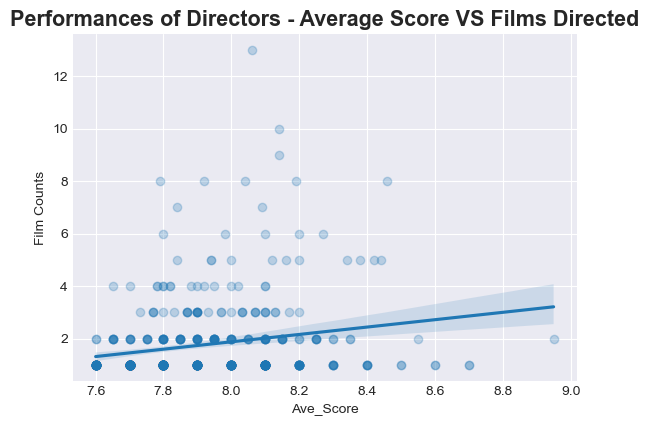

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(6.5, 4.5)

x=df_rate_dir['Ave_Score']
y=df_rate_dir['Film Counts']

#Draw data
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.25})
ax.set_title('Performances of Directors - Average Score VS Films Directed', fontsize=15.5, fontweight ='heavy')

#Calculate R^2 value
lin_reg = LinearRegression().fit(df_rate_dir[['Ave_Score']],y)
r2 = lin_reg.score(df_rate_dir[['Ave_Score']],y)

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### 2.8 Compared with other movies, did the "Director also participate in the film" have gained a higher IMDB rating or higher box office? Or tend to have higher or shorter time?

In [93]:
# Add a new list, whether the director is also performed in the movie
def dir_also_act(x):
    if (x['Director']==x['Actor_1'])|(x['Director']==x['Actor_2'])|(x['Director']==x['Actor_3']):
        return 1
    else:
        return 0

In [94]:
df_imdb.loc[:,'Director_Acted'] = df_imdb.apply(dir_also_act,axis=1)
df_imdb['Director_Acted'].value_counts()

0    783
1     34
Name: Director_Acted, dtype: int64

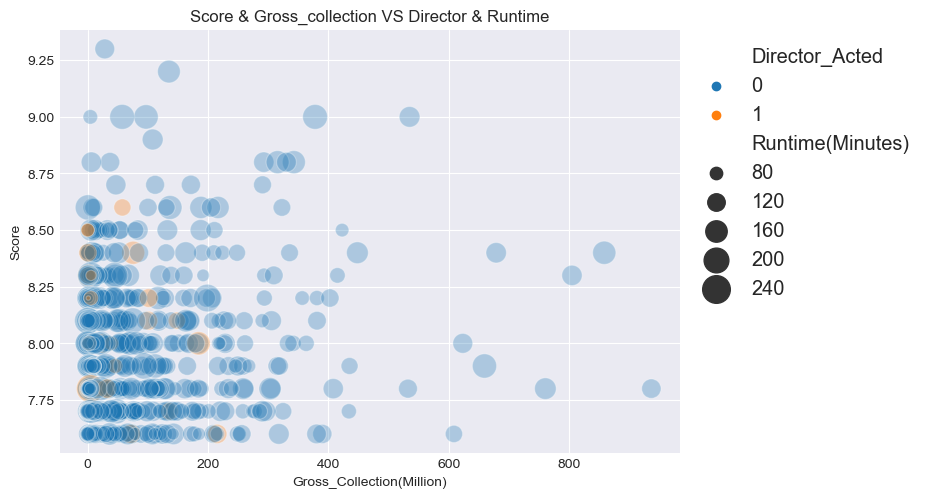

In [95]:
plt.figure(figsize=(8, 5.5))
sns.scatterplot(data=df_imdb, x='Gross_Collection(Million)', y='Score', 
                alpha=0.3, hue='Director_Acted', size='Runtime(Minutes)', sizes=(10, 400))
plt.title('Score & Gross_collection VS Director & Runtime')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize='x-large')

### 2.9 What are the development trends of some important film characteristics since the 1920s? (Such as making quantity, box office, duration, etc.)

In [96]:
# Number of movies
df_year_count=df_imdb.groupby('Year').count()
# Based on the total box office of the year
df_year_gross=df_imdb.groupby(['Year'])['Gross_Collection(Million)'].sum()
# Average annual running time (minute)
df_year_ave_runt=round(df_imdb.groupby('Year')['Runtime(Minutes)'].mean(),2)
# Number of voting
df_year_votes=df_imdb.groupby('Year')['Votes'].sum()

Text(0, 0.5, 'Total votes (Million)')

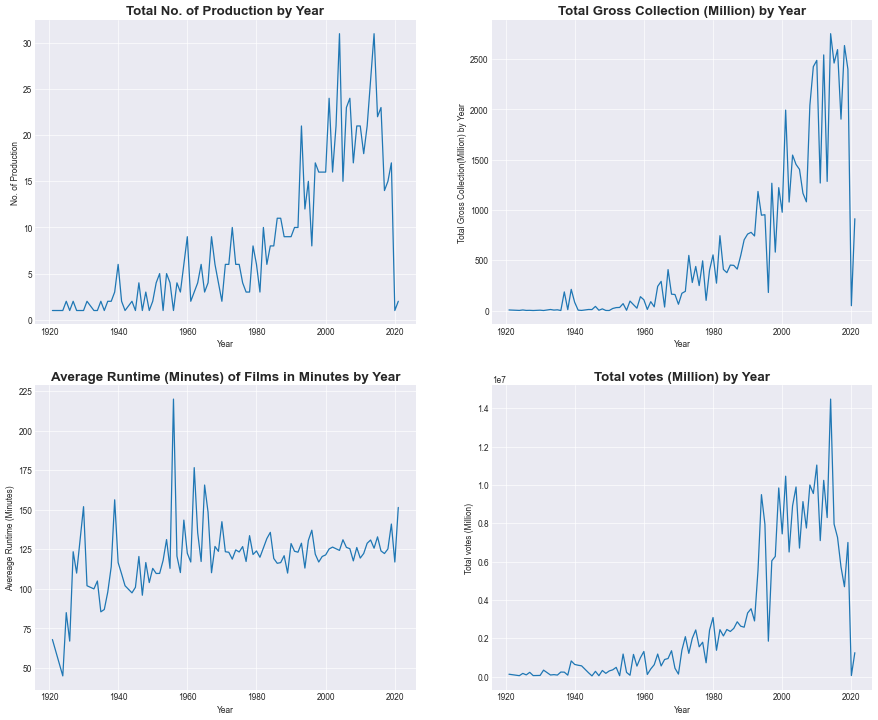

In [97]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(18,14.5), dpi=60, nrows=2, ncols=2)

sns.lineplot(data=df_year_count['Count'],ax=ax1)
sns.lineplot(data=df_year_gross,ax=ax2)
sns.lineplot(data=df_year_ave_runt,ax=ax3)
sns.lineplot(data=df_year_votes,ax=ax4)

ax1.set_title('Total No. of Production by Year', fontsize=16, fontweight ='bold')
ax2.set_title('Total Gross Collection (Million) by Year', fontsize=16, fontweight ='bold')
ax3.set_title('Average Runtime (Minutes) of Films in Minutes by Year', fontsize=16, fontweight ='bold')
ax4.set_title('Total votes (Million) by Year', fontsize=16, fontweight ='bold')

ax1.set_ylabel('No. of Production')
ax2.set_ylabel('Total Gross Collection(Million) by Year')
ax3.set_ylabel('Avereage Runtime (Minutes)')
ax4.set_ylabel('Total votes (Million)')

### 2.9 In different ages, which types or types of films are higher (more popular)?

In [98]:
# Check the most common type
display(df_imdb['Genre_1'].value_counts().nlargest(3),df_imdb['Genre_2'].value_counts().nlargest(3),df_imdb['Genre_3'].value_counts().nlargest(3))

Drama     229
Action    143
Comedy    128
Name: Genre_1, dtype: int64

Drama        276
Adventure     99
Crime         59
Name: Genre_2, dtype: int64

Drama       85
Thriller    79
Romance     64
Name: Genre_3, dtype: int64

In [99]:
# Check the most common type of movies
# Drama，Action，Comedy，Crime，Adventure，Thriller，Romance
Genre_list=['Drama','Action','Comedy','Crime','Adventure','Thriller','Romance']

for Genre in Genre_list:
    Genre_count=df_imdb[df_imdb['Genre'].str.contains(Genre)].shape[0]
    print(f'{Genre_count} films, i.e. {round(Genre_count/df_imdb.Genre.count()*100,2)}% of films are in "{Genre}" Genre. \n')

590 films, i.e. 72.22% of films are in "Drama" Genre. 

159 films, i.e. 19.46% of films are in "Action" Genre. 

192 films, i.e. 23.5% of films are in "Comedy" Genre. 

164 films, i.e. 20.07% of films are in "Crime" Genre. 

164 films, i.e. 20.07% of films are in "Adventure" Genre. 

104 films, i.e. 12.73% of films are in "Thriller" Genre. 

108 films, i.e. 13.22% of films are in "Romance" Genre. 



In [100]:
genre_1='Drama'
genre_2='Adventure'
genre_3='Action'
genre_4='Comedy'
genre_5='Crime'

genre_dra_name_list=[genre_2,genre_3,genre_4,genre_5]

dra_len=df_imdb[df_imdb['Genre'].str.contains(genre_1)].shape[0]
dra_only_len=df_imdb[df_imdb['Genre']==genre_1].shape[0]
adv_dra_len=df_imdb[(df_imdb['Genre'].str.contains(genre_2))&(df_imdb['Genre'].str.contains(genre_1))].shape[0]
act_dra_len=df_imdb[(df_imdb['Genre'].str.contains(genre_3))&(df_imdb['Genre'].str.contains(genre_1))].shape[0]
com_dra_len=df_imdb[(df_imdb['Genre'].str.contains(genre_4))&(df_imdb['Genre'].str.contains(genre_1))].shape[0]
cri_dra_len=df_imdb[(df_imdb['Genre'].str.contains(genre_5))&(df_imdb['Genre'].str.contains(genre_1))].shape[0]

genre_dra_len_list=[adv_dra_len,act_dra_len,com_dra_len,cri_dra_len]

print(f'Facts about {genre_1} genre and combinations with other genres, \n {dra_len} films are in the most popular genre - {genre_1}, ')
print(f'where {dra_only_len} of them i.e. {round(dra_only_len/dra_len*100,2)}% have {genre_1} as their only genre. ')
for genre,gen_len in zip(genre_dra_name_list,genre_dra_len_list):
    print(f'where {gen_len} of them, i.e. {round(gen_len/dra_len*100,2)}% are also in {genre} genre. ')

Facts about Drama genre and combinations with other genres, 
 590 films are in the most popular genre - Drama, 
where 73 of them i.e. 12.37% have Drama as their only genre. 
where 46 of them, i.e. 7.8% are also in Adventure genre. 
where 65 of them, i.e. 11.02% are also in Action genre. 
where 104 of them, i.e. 17.63% are also in Comedy genre. 
where 129 of them, i.e. 21.86% are also in Crime genre. 


In [101]:
# First of all, add the "year" to the new "age" column
df_imdb['Decade']=df_imdb['Year']//10*10
df_imdb.sample(5)

,Ranking,Movie_Name,Year,Runtime(Minutes),Genre,Score,Metascore,Director,Actor_1,Actor_2,Actor_3,Actor_4,Votes,Gross_Collection(Million),Genre_1,Genre_2,Genre_3,Count,Director_Acted,Decade
27,28,Seven,1995,127.0,"Crime, Drama, Mystery",8.6,65.0,David Fincher,Morgan Freeman,Brad Pitt,Kevin Spacey,Andrew Kevin Walker,1598334,100.13,Crime,Drama,Mystery,1,0,1990
55,56,Rear Window,1954,112.0,"Mystery, Thriller",8.5,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,482791,36.76,Mystery,Thriller,None,1,0,1950
778,779,Frost/Nixon,2008,122.0,"Biography, Drama, History",7.7,80.0,Ron Howard,Frank Langella,Michael Sheen,Kevin Bacon,Sam Rockwell,107749,18.59,Biography,Drama,History,1,0,2000
596,597,Hidden Figures,2016,127.0,"Biography, Drama, History",7.8,74.0,Theodore Melfi,Taraji P. Henson,Octavia Spencer,Janelle Monáe,Kevin Costner,224366,169.61,Biography,Drama,History,1,0,2010
620,621,The Big Short,2015,130.0,"Biography, Comedy, Drama",7.8,81.0,Adam McKay,Christian Bale,Steve Carell,Ryan Gosling,Brad Pitt,419242,70.26,Biography,Comedy,Drama,1,0,2010


In [102]:
# Extract the top three types of each age
df_top3_genre_1=df_imdb.groupby('Decade')['Genre_1'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()
df_top3_genre_2=df_imdb.groupby('Decade')['Genre_2'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()
df_top3_genre_3=df_imdb.groupby('Decade')['Genre_3'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()

### 2.10 In these years, what are the trends of the "average box office" and "production quantity" of these "popular movie type/type combinations"?

In [103]:
# Create data frames for all target type and type combination
df_dra=df_imdb[df_imdb['Genre']==genre_1]
df_adv_dra=df_imdb[(df_imdb['Genre'].str.contains(genre_2))&(df_imdb['Genre'].str.contains(genre_1))]
df_act_dra=df_imdb[(df_imdb['Genre'].str.contains(genre_3))&(df_imdb['Genre'].str.contains(genre_1))]
df_com_dra=df_imdb[(df_imdb['Genre'].str.contains(genre_4))&(df_imdb['Genre'].str.contains(genre_1))]
df_cri_dra=df_imdb[(df_imdb['Genre'].str.contains(genre_5))&(df_imdb['Genre'].str.contains(genre_1))]

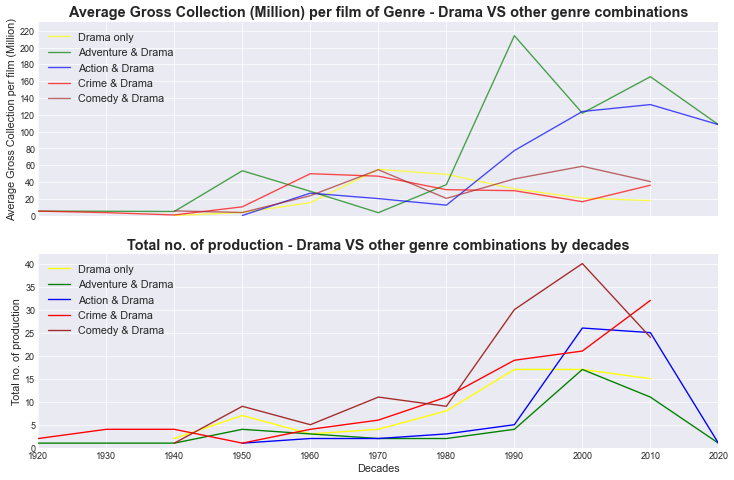

In [104]:
fig, (ax1, ax2) = plt.subplots(figsize=(13.5,8.5), nrows=2, dpi=65, sharex=True)

df_dra_gen_list=[df_dra,df_adv_dra,df_act_dra,df_com_dra,df_cri_dra]
c_list_1=['yellow','green','blue','red','brown']
label_list_1=['Drama only','Adventure & Drama','Action & Drama','Crime & Drama','Comedy & Drama']

for df_genre,colour,label in zip(df_dra_gen_list,c_list_1,label_list_1):
    ax1.plot(df_genre.groupby('Decade')['Gross_Collection(Million)'].mean(),c=colour,label=label,alpha=0.7)
    ax2.plot(df_genre.groupby('Decade')['Count'].sum(),color=colour,label=label)

ax1.set_title('Average Gross Collection (Million) per film of Genre - Drama VS other genre combinations',fontsize=16,fontweight ='bold')
ax2.set_title('Total no. of production - Drama VS other genre combinations by decades',fontsize=16,fontweight ='bold')

plt.xlim(1920,2020)
plt.xticks(range(1920,2030,10))
plt.xlabel('Decades',fontsize=12)
ax1.set_yticks(range(0,230,20))
ax1.set_ylim(0,230)
ax1.legend(fontsize='large')
ax1.set_ylabel('Average Gross Collection per film (Million)',fontsize=12)

ax2.set_yticks(range(0,42,5))
ax2.set_ylim(0,42)
ax2.legend(fontsize='large')
ax2.set_ylabel('Total no. of production',fontsize=12)

plt.show()

### 2.11、What are the correlation between the different characteristics of these "popular movie type/type combinations" movies

In [105]:
# Create a new column "Genre_comb" from the most common type combination with drama
df_dra.loc[:,'Genre_Comb']='Drama'
df_adv_dra.loc[:,'Genre_Comb']='Adventure & Drama'
df_act_dra.loc[:,'Genre_Comb']='Action & Drama'
df_com_dra.loc[:,'Genre_Comb']='Comedy & Drama'
df_cri_dra.loc[:,'Genre_Comb']='Crime & Drama'

/var/folders/zq/p2d6bynj3zzdl_5hz8cv2qqr0000gn/T/ipykernel_206/126465638.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zq/p2d6bynj3zzdl_5hz8cv2qqr0000gn/T/ipykernel_206/126465638.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zq/p2d6bynj3zzdl_5hz8cv2qqr0000gn/T/ipykernel_206/126465638.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [106]:
# Merge all data frames
df_dra_all=pd.concat([df_dra, df_adv_dra, df_act_dra, df_com_dra, df_cri_dra],ignore_index=True)
df_dra_all.head()

,Ranking,Movie_Name,Year,Runtime(Minutes),Genre,Score,Metascore,Director,Actor_1,Actor_2,...,Actor_4,Votes,Gross_Collection(Million),Genre_1,Genre_2,Genre_3,Count,Director_Acted,Decade,Genre_Comb
0,1,The Shawshank Redemption,1994,142.0,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,...,William Sadler,2603314,28.34,Drama,None,None,1,0,1990,Drama
1,12,Fight Club,1999,139.0,Drama,8.8,66.0,David Fincher,Brad Pitt,Edward Norton,...,Zach Grenier,2050591,37.03,Drama,None,None,1,0,1990,Drama
2,20,One Flew Over the Cuckoo's Nest,1975,133.0,Drama,8.7,84.0,Milos Forman,Jack Nicholson,Louise Fletcher,...,Peter Brocco,988024,112.00,Drama,None,None,1,0,1970,Drama
3,61,Capernaum,2018,126.0,Drama,8.4,75.0,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,...,Kawsar Al Haddad,85804,1.66,Drama,None,None,1,0,2010,Drama
4,78,American Beauty,1999,122.0,Drama,8.4,84.0,Sam Mendes,Kevin Spacey,Annette Bening,...,Wes Bentley,1135911,130.10,Drama,None,None,1,0,1990,Drama


/Users/ewanlong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



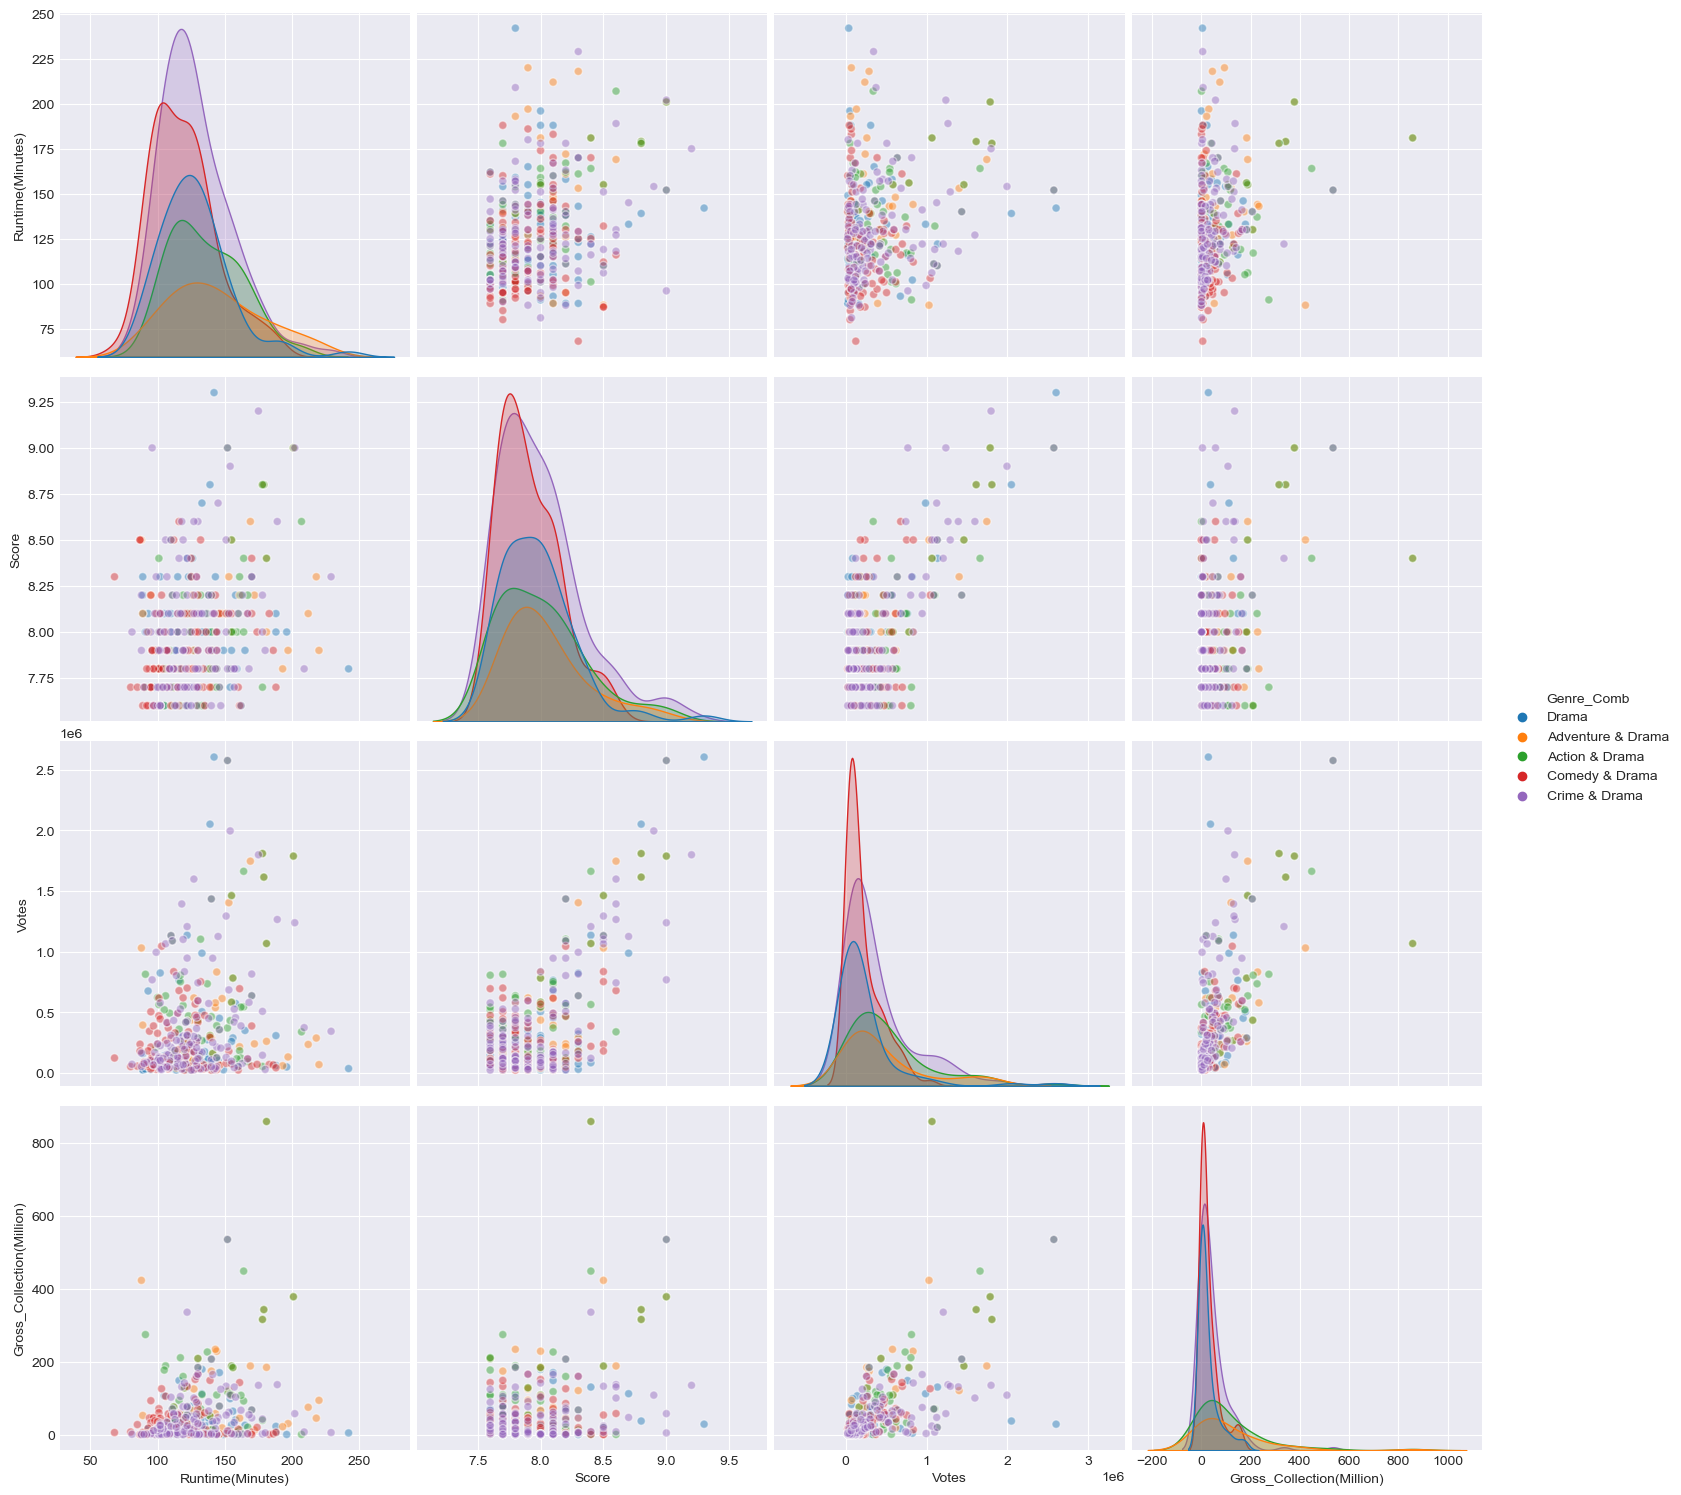

In [107]:
sns.pairplot(df_dra_all[['Runtime(Minutes)','Score','Votes','Gross_Collection(Million)','Genre_Comb']],hue='Genre_Comb',plot_kws={'alpha':0.45,'linewidth':1},size=3.8)

### 2.12 Back to the "popular movie type/type combination", does they tend to get higher IMDB rating or higher box office compared to other movies?

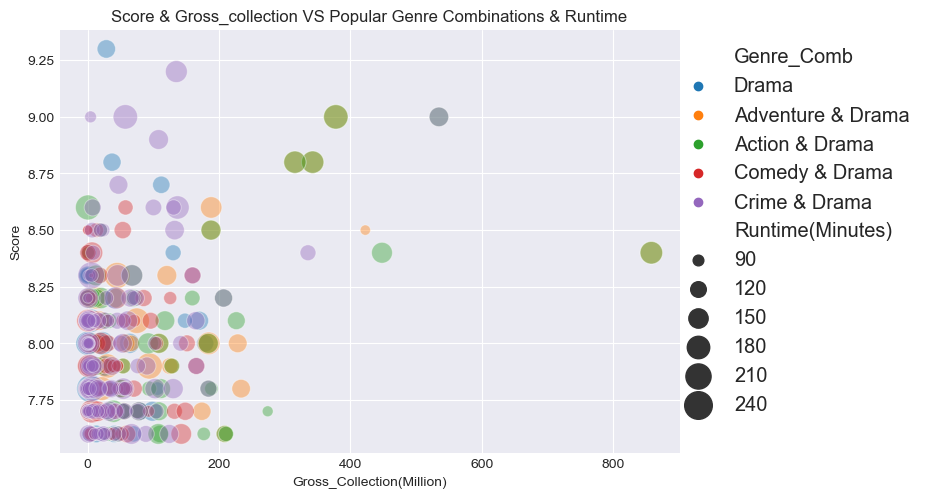

In [108]:
plt.figure(figsize=(8, 5.5))
sns.scatterplot(data=df_dra_all, x='Gross_Collection(Million)', y='Score', 
                alpha=0.4, hue='Genre_Comb', size='Runtime(Minutes)', sizes=(10, 400))
plt.title('Score & Gross_collection VS Popular Genre Combinations & Runtime')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize='x-large')